**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

# K-Means Clustering Algorithm

K-means is a popular unsupervised machine learning algorithm used for partitioning a dataset into *k* distinct, non-overlapping clusters. It aims to minimize the within-cluster sum of squares (WCSS), making clusters as compact as possible.

## How K-Means Works: A Step-by-Step Guide

The k-means algorithm follows an iterative process:

1.  **Initialization:**
    *   Choose the number of clusters, *k*. This is a crucial step and often requires using methods like the Elbow Method or Silhouette Analysis (explained later) to determine an appropriate value.
    *   Randomly select *k* data points from the dataset as initial cluster centers (centroids).

2.  **Assignment Step:**
    *   For each data point in the dataset:
        *   Calculate the distance between the data point and each of the *k* centroids (usually using Euclidean distance).
        *   Assign the data point to the cluster whose centroid is closest to it.

3.  **Update Step:**
    *   For each of the *k* clusters:
        *   Calculate the new centroid as the *mean* of all the data points assigned to that cluster. This new centroid becomes the updated center of the cluster.

4.  **Iteration:**
    *   Repeat steps 2 (Assignment) and 3 (Update) until one of the following convergence criteria is met:
        *   The centroids no longer change significantly between iterations.
        *   A maximum number of iterations is reached.

## Example:

Imagine you have data points scattered on a 2D plane. You want to cluster them into 3 groups (k=3).

1.  You randomly pick 3 points as initial centroids.
2.  You assign each data point to the closest centroid, forming 3 initial clusters.
3.  You calculate the mean of the points in each cluster, and these means become the new centroids.
4.  You repeat the assignment and update steps until the centroids stabilize.

## Determining the Optimal Number of Clusters (k):

Choosing the correct value for *k* is essential for good clustering results. Here are two common methods:

### 1. Elbow Method:

*   Run the k-means algorithm for a range of *k* values (e.g., from 1 to 10).
*   For each *k*, calculate the Within-Cluster Sum of Squares (WCSS). WCSS is the sum of the squared distances between each data point and its cluster's centroid.
*   Plot WCSS against *k*.
*   Look for the "elbow point" in the plot, where the rate of decrease in WCSS starts to slow down significantly. This point is often a good estimate for the optimal *k*.

### 2. Silhouette Analysis:

*   For each data point:
    *   Calculate 'a': The average distance to all other points within the same cluster.
    *   Calculate 'b': The average distance to all points in the nearest other cluster.
    *   Calculate the Silhouette Coefficient: `s = (b - a) / max(a, b)`
*   The silhouette coefficient ranges from -1 to 1:
    *   +1: Data point is well-clustered.
    *   0: Data point is close to the decision boundary.
    *   -1: Data point is likely assigned to the wrong cluster.
*   Calculate the average silhouette score for all data points for different values of *k*. The *k* with the highest average silhouette score is often chosen.

## Advantages of K-Means:

*   **Simple and easy to implement:** The algorithm is relatively straightforward to understand and implement.
*   **Efficient for large datasets:** It can be computationally efficient, especially for datasets with a moderate number of features.

## Disadvantages of K-Means:

*   **Sensitive to initial centroid selection:** Different initializations can lead to different clustering results (local optima). Running the algorithm multiple times with different random initializations and choosing the best result is a common practice.
*   **Assumes spherical clusters:** K-means works best when clusters are roughly spherical and have similar sizes. It may struggle with non-spherical clusters or clusters with varying densities.
*   **Requires specifying *k* beforehand:** Determining the optimal number of clusters can be challenging.
*   **Sensitive to outliers:** Outliers can significantly influence the position of the centroids.

## Applications:

K-means is used in a wide range of applications, including:

*   **Customer segmentation:** Grouping customers based on purchasing behavior or demographics.
*   **Image compression:** Reducing the number of colors in an image by clustering similar colors.
*   **Anomaly detection:** Identifying unusual data points that don't belong to any cluster.

This comprehensive explanation should be suitable for your README file. It covers the core concepts, steps, methods for choosing *k*, advantages, disadvantages, and common applications of the k-means algorithm.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

In [ ]:
#creating synthatic data
n_clusters=2
X,y= make_blobs(n_samples= 300, n_features=2,centers = n_clusters, random_state=42)
df=pd.DataFrame(X,y)
df

In [7]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [8]:
# Calculate metrics
silhouette_avg = silhouette_score(X, labels)
print("silhouette_avg=", silhouette_avg)

silhouette_avg= 0.5623429051899755


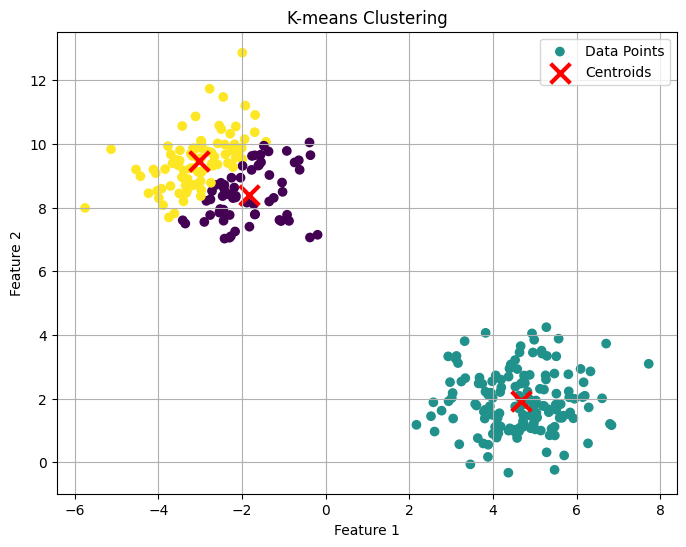

In [9]:
# Plot the results
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Data Points')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Elbow Method to find optimal k

inertia = []
possible_k_values = range(1, 11) # Test k from 1 to 10
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # Inertia: Sum of squared distances to nearest centroid


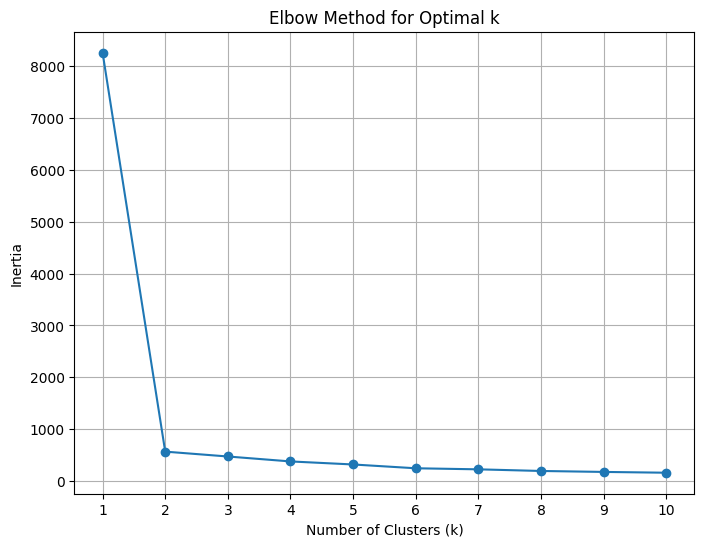

In [12]:
# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(possible_k_values) # Ensure all k values are shown on x-axis
plt.grid(True)
plt.show()

In [30]:
#Example of using a different number of clusters based on the elbow method.
kmeans_optimal = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_optimal.fit(X)
labels_optimal = kmeans_optimal.labels_
centroids_optimal = kmeans_optimal.cluster_centers_

In [31]:
# Calculate metrics
silhouette_avg = silhouette_score(X, labels_optimal)
print("silhouette_avg=", silhouette_avg)

silhouette_avg= 0.3174805265620532


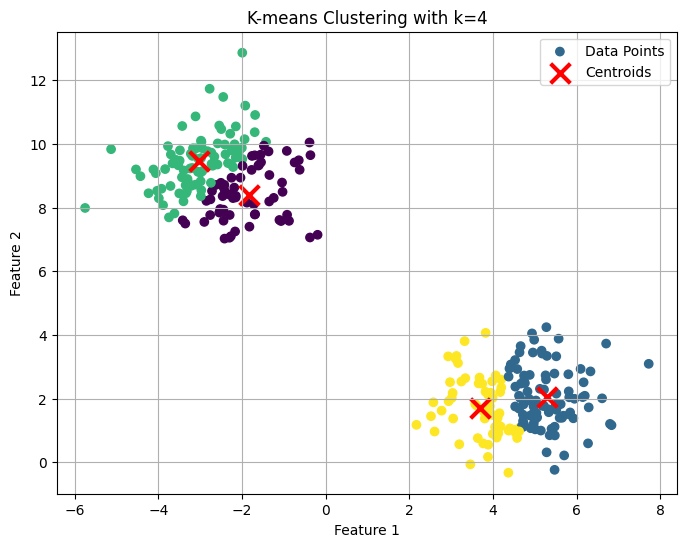

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, cmap='viridis', label='Data Points')
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
plt.title('K-means Clustering with k=4')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Here with k=4 I got best clusters and separation of clusters , you need try with other k values to find  best clusters and also there are other metrics you can try.